In [1]:
import pandas as pd

In [81]:
df = pd.read_csv("ML_2_Fellow.csv", encoding = "ISO-8859-1")
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [83]:
# Removing returned items transactions and negative values
filt_return = df["Kode_Bayar"].str.contains("C")
filt_positive = df["Jumlah"] > 0
df = df[~filt_return]
df = df[filt_positive]

C:\Users\asus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [84]:
df[df["Jumlah"] < 0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara


In [85]:
df["Harga_Bayar"] = df["Jumlah"] * df["Harga_Satuan"]

In [87]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Harga_Bayar
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## Most bought items

In [88]:
# df.groupby('Barang').agg({'Jumlah':sum}).sort_values(['Jumlah'],ascending=False).head(5)
print(df.groupby("Barang")["Jumlah"].count().sort_values(ascending=False).head())
print(df.groupby("Barang")["Jumlah"].sum().sort_values(ascending=False).head())

Barang
WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
Name: Jumlah, dtype: int64
Barang
MEDIUM CERAMIC TOP STORAGE JAR        78033.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047.0
JUMBO BAG RED RETROSPOT               48478.0
WHITE HANGING HEART T-LIGHT HOLDER    37895.0
POPCORN HOLDER                        36761.0
Name: Jumlah, dtype: float64


In [89]:
# df.groupby('Barang').agg({'Jumlah':sum}).sort_values(['Jumlah'],ascending=False).head(5)
print(df.groupby("Barang")["Jumlah"].count().sort_values(ascending=True).head())
print(df.groupby("Barang")["Jumlah"].sum().sort_values(ascending=True).head())

Barang
wrongly sold (22719) barcode         1
GOLD COSMETICS BAG WITH BUTTERFLY    1
SET 36 COLOURING PENCILS DOILEY      1
OPULENT VELVET SET/3 CANDLES         1
OOH LA LA DOGS COLLAR                1
Name: Jumlah, dtype: int64
Barang
BLUE DROP EARRINGS W BEAD CLUSTER    1.0
SET OF 3 PINK FLYING DUCKS           1.0
ORANGE/FUSCHIA STONES NECKLACE       1.0
VINTAGE BEAD PINK JEWEL STAND        1.0
PACK 4 FLOWER/BUTTERFLY PATCHES      1.0
Name: Jumlah, dtype: float64


## Country with most transactions

In [95]:
df.groupby(by=["Negara"]).count().sort_values(by='Barang',ascending=False).head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Harga_Bayar
Negara,,,,,,,,
United Kingdom,480601,480601,480009,480601,480601,480601,351031,480601
Germany,8998,8998,8998,8998,8998,8998,8998,8998
France,8376,8376,8376,8376,8376,8376,8310,8376
EIRE,7837,7837,7837,7837,7837,7837,7182,7837
Spain,2465,2465,2465,2465,2465,2465,2465,2465


## Customer Segmentation

In [96]:
from sklearn.preprocessing import StandardScaler

In [98]:
X = df[["Harga_Satuan", "Jumlah"]]
X.head()

,Harga_Satuan,Jumlah
0,2.55,6.0
1,3.39,6.0
2,2.75,8.0
3,3.39,6.0
4,3.39,6.0


In [100]:
scaler = StandardScaler()
data_segmentation = scaler.fit_transform(X)

In [110]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 14, random_state=3)
model.fit(X)
labels = model.labels_

In [111]:
df["cluster"] = labels

In [112]:
df.groupby("cluster").count()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Harga_Bayar
cluster,,,,,,,,,
0,512300,512300,511802,512300,512300,512300,382638,512300,512300
1,1,1,1,1,1,1,1,1,1
2,121,121,117,121,121,121,112,121,121
3,9566,9566,9506,9566,9566,9566,9006,9566,9566
4,3,3,3,3,3,3,1,3,3
5,2,2,2,2,2,2,0,2,2
6,6,6,6,6,6,6,4,6,6
7,1,1,1,1,1,1,1,1,1
8,657,657,657,657,657,657,147,657,657


In [105]:
# cdist will be used to calculate distances between points and centroids
from scipy.spatial.distance import cdist

In [106]:
# all the of the calculated distances with different values of K will be stored in this list
error = []

In [107]:
# repeat for values of K = 1 to K = 14
for k in range(1,15):
    # initalize the model with the value of k
    kmeanmodel = KMeans(n_clusters=k)
    # fit the data
    kmeanmodel.fit(X)
    # calculate the distance using cdist
    # find the minimum (because an element will belong to closest cluster)
    # and sum up all the distances
    dist = sum(np.min( cdist(X, kmeanmodel.cluster_centers_),axis=1)/X.shape[0] )
    # put the distance error in the error list
    error.append(dist)

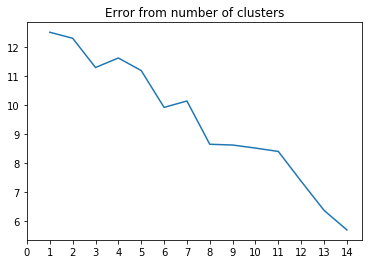

In [116]:
# plot the results of elbow method
import matplotlib.pyplot as plt
plt.plot(range(1,15), error)
plt.xticks(range(0,15))
plt.title("Error from number of clusters")
plt.show()

Text(0.5, 1.0, 'Customer Segmentation')

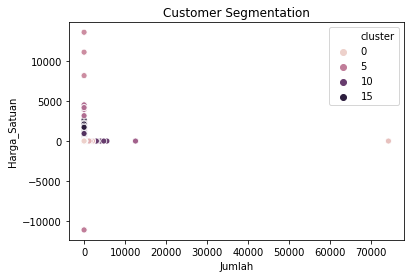

In [117]:
import seaborn as sns
sns.scatterplot(x='Jumlah', y='Harga_Satuan', hue='cluster', data=df)
plt.title("Customer Segmentation")

## Hidden insights

In [126]:
df.groupby("Kode_Pelanggan").count().sort_values(by="Kode_Barang",ascending=False).head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Negara,Harga_Bayar,cluster
Kode_Pelanggan,,,,,,,,,
17841.0,7755,7755,7755,7755,7755,7755,7755,7755,7755
14911.0,5636,5636,5636,5636,5636,5636,5636,5636,5636
14096.0,5021,5021,5021,5021,5021,5021,5021,5021,5021
12748.0,4556,4556,4556,4556,4556,4556,4556,4556,4556
14606.0,2587,2587,2587,2587,2587,2587,2587,2587,2587


In [127]:
df.groupby("Kode_Pelanggan")["Harga_Bayar"].sum().sort_values(ascending=False).head()

Kode_Pelanggan
14646.0    278788.58
18102.0    259657.30
17450.0    194550.79
14911.0    143260.39
12415.0    123146.21
Name: Harga_Bayar, dtype: float64